In [2]:
import pandas as pd

In [119]:
df = pd.read_csv('../input/bank-train.csv', index_col = 0)

In [120]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [79]:
import sys
sys.path.append('../src/')

In [114]:
from categorical import CategoricalFeatures

In [150]:
cols = [c for c in df.columns if not df[c].dtype in ('int64', 'float64')]

In [151]:
cat_feats = CategoricalFeatures(df, 
                                categorical_features=cols, 
                                encoding_type="label",
                                handle_na=True)


In [152]:
df_transformed = cat_feats.fit_transform()

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
clf = RandomForestClassifier(n_estimators = 100, n_jobs = -1, verbose = 2)

In [167]:
clf.fit(df_transformed.drop(['y'], axis = 1), df_transformed['y'])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


building tree 1 of 100building tree 2 of 100building tree 3 of 100building tree 4 of 100



building tree 5 of 100building tree 6 of 100building tree 7 of 100


building tree 8 of 100
building tree 9 of 100
building tree 10 of 100building tree 11 of 100
building tree 12 of 100

building tree 13 of 100building tree 14 of 100
building tree 15 of 100

building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100building tree 42 of 100

b

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=2,
                       warm_start=False)

In [178]:
from scipy.cluster import hierarchy as hc

In [183]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

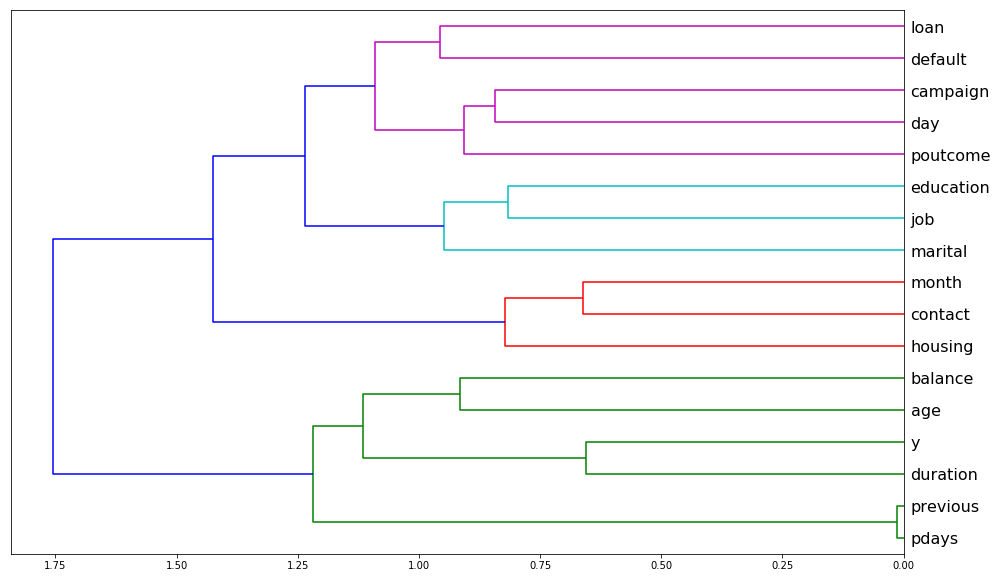

In [204]:
corr = np.round(scipy.stats.spearmanr(df_transformed).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='ward')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_transformed.columns, orientation='left', leaf_font_size=16)
plt.show()

In [211]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='average')
clusters = cluster.fit_predict(corr)

In [193]:
clusters

array([0, 0, 0, ..., 0, 0, 0])

In [212]:
imps = dict(zip(df_transformed.drop(['y'], axis = 1).columns, zip(clf.feature_importances_, clusters)))

In [224]:
imps_df = pd.DataFrame(imps).transpose().reset_index()

In [229]:
list(imps_df.groupby(1)['index'].agg({0: 'min'})[0])

/Users/abhinavkatoch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


['contact', 'campaign', 'age', 'balance']

In [225]:
imps_df

,index,0,1
0,age,0.105247,2.0
1,job,0.049610,2.0
2,marital,0.026192,2.0
3,education,0.028340,1.0
4,default,0.003444,3.0
5,balance,0.106674,3.0
6,housing,0.021015,2.0
7,loan,0.009558,2.0
8,contact,0.019452,0.0
9,day,0.093552,0.0


In [230]:
def hc_selector(df):
    
    cols = [c for c in df.columns if not df[c].dtype in ('int64', 'float64')]
    cat_feats = CategoricalFeatures(df, 
                                categorical_features=cols, 
                                encoding_type="label",
                                handle_na=True)


    df_transformed = cat_feats.fit_transform()
    corr = np.round(scipy.stats.spearmanr(df_transformed).correlation, 4)
    cluster = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='average')
    clusters = cluster.fit_predict(corr)
    imps = dict(zip(df_transformed.drop(['y'], axis = 1).columns, zip(clf.feature_importances_, clusters)))
    imps_df = pd.DataFrame(imps).transpose().reset_index()
    to_drop = list(imps_df.groupby(1)['index'].agg({0: 'min'})[0])
    
    return df.transformed.drop(to_drop, axis = 1)